# Exploratory Data Analysis

#### Downloaded season "Advanced Stat" data from Hockey-Reference.com
The advanced stat finder is available <a href=http://b.hkref.com/play-index/tpbp_finder.cgi>here</a>

The data downloaded did not come with detailed information on playoff success, which is a key part of my statistical analysis, so I went through each playoff from 2007-2008 until 2014-2015 to mark the success of making the playoffs and making the conference finals.

I used data from <a href=http://b.hkref.com/playoffs/NHL_2015.html>here</a> and I did this manually. I could have used a webscraper but by the time I would have made one, it would have been the same amout of time as going through the pages manually

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_csv = pd.read_csv("teamADV_playoff.csv")
raw_df = pd.DataFrame(raw_csv)

In [3]:
raw_df.describe()

,Rk,CF,CA,Cfperc,FF,FA,Ffperc,oiSHperc,oiSVperc,PDO,oZSperc,dZSperc,FOwin,FOloss,Foperc,HIT,BLK,Playoff,ConfFinal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,4195.344444,4206.696296,49.945556,3157.003704,3157.003704,50.008148,9.060370,90.940741,100.005556,51.075185,48.924815,2230.877778,2230.840741,49.995556,1715.674074,1049.692593,0.474074,0.118519
std,78.086491,689.713865,701.188495,2.795928,526.737398,531.204268,2.774098,0.847928,0.888530,1.199600,2.737339,2.737339,338.960827,334.371030,1.999735,367.597967,200.251844,0.500255,0.323821
min,1.000000,2282.000000,2000.000000,38.000000,1706.000000,1485.000000,39.300000,6.900000,88.500000,96.300000,42.400000,39.500000,1267.000000,1241.000000,44.200000,840.000000,511.000000,0.000000,0.000000
25%,68.250000,3995.500000,3876.750000,48.025000,3027.000000,3000.250000,48.200000,8.500000,90.200000,99.300000,49.400000,47.225000,2161.250000,2126.000000,48.600000,1499.000000,944.000000,0.000000,0.000000
50%,135.500000,4385.500000,4392.000000,50.150000,3295.000000,3304.500000,50.200000,9.100000,91.000000,100.100000,51.200000,48.800000,2323.000000,2337.000000,50.100000,1709.000000,1063.500000,0.000000,0.000000
75%,202.750000,4673.500000,4696.750000,52.000000,3514.750000,3495.000000,52.000000,9.600000,91.500000,100.700000,52.775000,50.600000,2436.000000,2427.750000,51.300000,1935.500000,1196.250000,1.000000,0.000000
max,270.000000,5378.000000,5617.000000,59.100000,3998.000000,4228.000000,59.200000,11.600000,93.300000,103.300000,60.500000,57.600000,2804.000000,2760.000000,56.400000,2685.000000,1569.000000,1.000000,1.000000


### Judging by the description we arne't missing any values, but we want to get rid of the columns that don't have value that we can measure. 
* We will keep rank just to see if the overall idea of being ranked high in "Corsi" has any value.

In [4]:
raw_df = raw_df.drop(["Tm","Season"],axis=1)

In [5]:
raw_df.head()

,Rk,CF,CA,Cfperc,FF,FA,Ffperc,oiSHperc,oiSVperc,PDO,oZSperc,dZSperc,FOwin,FOloss,Foperc,HIT,BLK,Playoff,ConfFinal
0,27,4873,4372,52.7,3657,3316,52.4,9.3,89.6,98.9,53.7,46.3,2479,2539,49.4,1741,1056,0,0
1,30,4864,3361,59.1,3852,2652,59.2,8.9,90.8,99.6,60.5,39.5,2435,2136,53.3,1413,709,1,1
2,71,4669,4457,51.2,3557,3392,51.2,9.0,89.3,98.3,52.8,47.2,2317,2336,49.8,1547,1065,0,0
3,84,4598,3939,53.9,3576,2926,55.0,7.9,91.1,99.1,58.9,41.1,2309,2107,52.3,2137,1013,1,0
4,90,4584,4078,52.9,3545,3073,53.6,9.4,90.0,99.4,53.4,46.6,2422,2312,51.2,1599,1005,1,0


### Now let's bring in a data dictionary!



Rk -- Rank

CF -- Corsi For in All Situations (Shots + Blocks + Misses)

CA -- Corsi Against in All Situations (Shots + Blocks + Misses)
CF% -- Corsi For % in All Situations
CF / (CF + CA)
    <em>Above 50% means the team was controlling the
    puck more often than not with this player on the
    ice in this situation.</em>

FF -- Fenwick For in All Situations
Shots + Misses

FA -- Fenwick Against in All Situations
Shots + Misses

FF% -- Fenwick For % in All Situations
FF / (FF + FA)
<em>Above 50% means the team was controlling the
puck more often than not with this player on the
ice in this situation.</em>

oiSH% -- Team On-Ice Shooting Percentage in All Situations
Shooting % while this player/team was on the ice

oiSV% -- Team On-Ice Save Percentage in All Situations
Save % while this player/team was on the ice

PDO -- PDO in All Situations
Shooting % + Save %

oZS% -- Offensive Zone Start % in All Situations
Offensive Zone Faceoffs / (Offensive Zone Faceoffs + Defensive Zone Faceoffs),
that took place while on the ice

dZS% -- Defensive Zone Start % in All Situations
Defensive Zone Faceoffs / (Offensive Zone Faceoffs + Defensive Zone Faceoffs),
that took place while on the ice

FOwin -- Faceoff Wins in All Situations

FOloss -- Faceoff Losses in All Situations

FO% -- Faceoff Win Percentage in All Situations

HIT -- Hits in All Situations

BLK -- Blocks in All Situations
 
Playoff -- Binary: 1 Made Playoffs, 0 Did Not

ConfFinal -- Binary: 1 Made Conference Final, 0 Did Not

In [6]:
list(raw_df.columns)

['Rk',
 'CF',
 'CA',
 'Cfperc',
 'FF',
 'FA',
 'Ffperc',
 'oiSHperc',
 'oiSVperc',
 'PDO',
 'oZSperc',
 'dZSperc',
 'FOwin',
 'FOloss',
 'Foperc',
 'HIT',
 'BLK',
 'Playoff',
 'ConfFinal']

It looks like many of our exogenous variables are close to being normally distributed


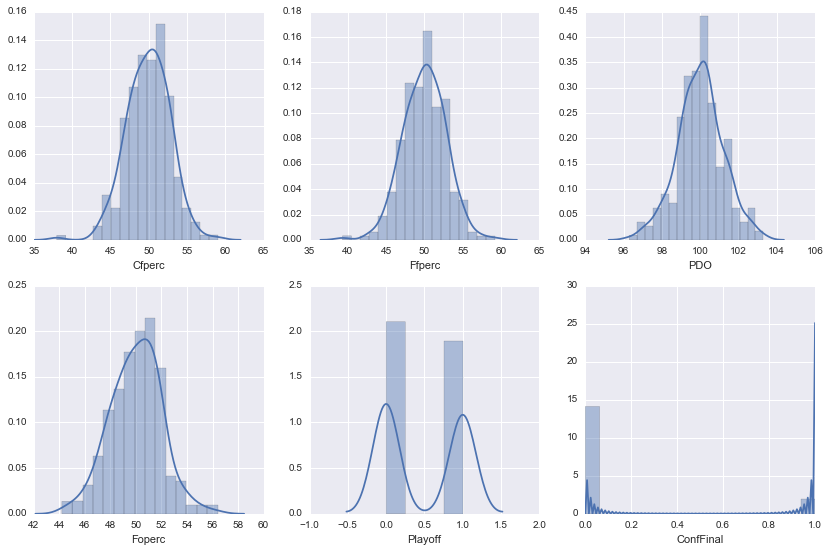

In [7]:
plt.figure(figsize=(14,9))
dat_cols=[None,'Cfperc','Ffperc','PDO','Foperc','Playoff','ConfFinal']
for i in range(1,7):
    plt.subplot(2,3,i)
    sb.distplot(raw_df[dat_cols[i]])
print("It looks like many of our exogenous variables are close to being normally distributed")

#### I think Corsi and Total Shots are going to be good ways of tracking making it to the playoffs and "season success," which I define as making the conference finals. But since we don't that imported yet, let's use shooting percentage.

In [8]:
sh_corsi_conf = raw_df[["Cfperc","oiSHperc","ConfFinal"]]
sh_corsi_yes = sh_corsi_conf[sh_corsi_conf["ConfFinal"]==1]
sh_corsi_no = sh_corsi_conf[sh_corsi_conf["ConfFinal"]==0]

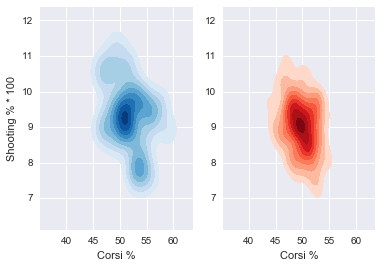

In [9]:
ax1 = plt.subplot(1,2,1)
sb.kdeplot(sh_corsi_yes, shade=True, cmap="Blues", shade_lowest=False, sharey=True, sharex=True)
sb.axlabel("Corsi %","Shooting % * 100")
ax2 = plt.subplot(1,2,2, sharey=ax1, sharex=ax1)
sb.kdeplot(sh_corsi_no, shade=True, cmap="Reds", shade_lowest=False, sharey=True, sharex=True)
sb.axlabel("Corsi %","")

#### The Blue's are teams that made the conference final, but the reds are teams that don't. The sample size for teams that made the conference final is not large, but appears to be much more widely distributed compared to the teams that did not make it. 
<br>Let's look at the same data but for teams that made or did not make the playoffs.

In [10]:
sh_corsi_playoff = raw_df[["Cfperc","oiSHperc","Playoff"]]
sh_corsi_pfyes = sh_corsi_playoff[sh_corsi_playoff["Playoff"]==1]
sh_corsi_pfno = sh_corsi_playoff[sh_corsi_playoff["Playoff"]==0]
sh_corsi_playoff.head()

,Cfperc,oiSHperc,Playoff
0,52.7,9.3,0
1,59.1,8.9,1
2,51.2,9.0,0
3,53.9,7.9,1
4,52.9,9.4,1


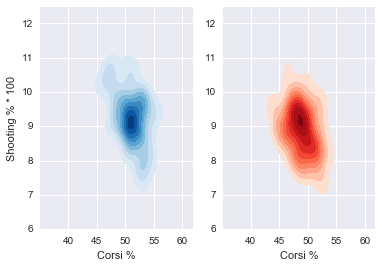

In [11]:
ax1 = plt.subplot(1,2,1)
sb.kdeplot(sh_corsi_pfyes, shade=True, cmap="Blues", shade_lowest=False, sharey=True, sharex=True)
sb.axlabel("Corsi %","Shooting % * 100")
ax2 = plt.subplot(1,2,2, sharey=ax1, sharex=ax1)
sb.kdeplot(sh_corsi_pfno, shade=True, cmap="Reds", shade_lowest=False, sharey=True, sharex=True)
sb.axlabel("Corsi %","")

#### If we look at the contour distributions those that made the playoffs are more tightly distributed and tend to have a higher corsi while only a marginal difference in shotting percentage. 

But before we get ahead of ourselves, since it looks like we can make some good assumptions on corsi, let's check the colinearity of our initial dataset.

We'll start by removing unneeded or frames we know are going to be highly correlated, like offsensive vs. defensive zone face off starts. Since they are directly correlated to each other.

In [12]:
data_corr = raw_df[['Rk','CF','Cfperc','FF','Ffperc','oiSHperc','PDO','oZSperc',\
                   'FOwin','Foperc','HIT','BLK','Playoff','ConfFinal']]

In [20]:
data_corr = data_corr.corr(method="pearson")
data_corr[(data_corr > 0.75) | (data_corr<(-0.75))]

,Rk,CF,Cfperc,FF,Ffperc,oiSHperc,PDO,oZSperc,FOwin,Foperc,HIT,BLK,Playoff,ConfFinal
Rk,1.000000,-0.993437,NaN,-0.994039,NaN,0.955003,0.973317,NaN,-0.973734,NaN,-0.957887,-0.858418,NaN,NaN
CF,-0.993437,1.000000,NaN,0.999985,NaN,-0.914810,-0.940683,NaN,0.993387,NaN,0.984445,0.911456,NaN,NaN
Cfperc,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.998979,NaN,0.997317,NaN,NaN,NaN,NaN
FF,-0.994039,0.999985,NaN,1.000000,NaN,-0.916976,-0.942499,NaN,0.992753,NaN,0.983483,0.909224,NaN,NaN
Ffperc,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.998995,NaN,0.997342,NaN,NaN,NaN,NaN
oiSHperc,0.955003,-0.914810,NaN,-0.916976,NaN,1.000000,0.997579,NaN,-0.862388,-0.754435,-0.829620,NaN,NaN,NaN
PDO,0.973317,-0.940683,NaN,-0.942499,NaN,0.997579,1.000000,NaN,-0.895506,NaN,-0.866439,NaN,NaN,NaN
oZSperc,NaN,NaN,0.998979,NaN,0.998995,NaN,NaN,1.000000,NaN,0.999606,NaN,NaN,NaN,NaN
FOwin,-0.973734,0.993387,NaN,0.992753,NaN,-0.862388,-0.895506,NaN,1.000000,NaN,0.998107,0.952664,NaN,-0.766069
Foperc,NaN,NaN,0.997317,NaN,0.997342,-0.754435,NaN,0.999606,NaN,1.000000,NaN,NaN,NaN,NaN


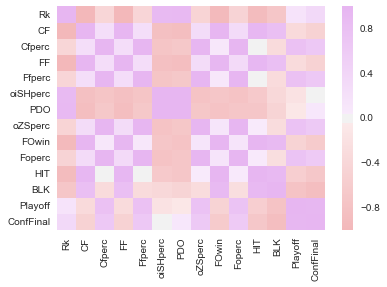

In [18]:
color_pal = sb.diverging_palette(10,300, l=80, n=50, as_cmap=True)
sb.heatmap(data_corr, cmap=color_pal)

#### We can see a lot of multicolinearity, time to get rid of those pairs for when we make a model!

In [23]:
collin_list = [("Rk","CF"),("CF","FF"),("CF","oiSHperc"),("CF","PDO"),("CF","HIT"),("CF","BLK"),("Ffperc","Foperc")]

In [37]:
team_stats = raw_df[['Cfperc','Ffperc','PDO','Foperc','oiSHperc','oZSperc','Playoff','ConfFinal']]
team_stats.Cfperc = team_stats.Cfperc.map(lambda x: x/100)
team_stats.Ffperc = team_stats.Ffperc.map(lambda x: x/100)
team_stats.PDO = team_stats.PDO.map(lambda x: x/100)
team_stats.Foperc = team_stats.Foperc.map(lambda x: x/100)
team_stats.oiSHperc = team_stats.oiSHperc.map(lambda x: x/100)
team_stats.oZSperc = team_stats.oZSperc.map(lambda x: x/100)

In [38]:
team_stats.head()

,Cfperc,Ffperc,PDO,Foperc,oiSHperc,oZSperc,Playoff,ConfFinal
0,0.527,0.524,0.989,0.494,0.093,0.537,0,0
1,0.591,0.592,0.996,0.533,0.089,0.605,1,1
2,0.512,0.512,0.983,0.498,0.090,0.528,0,0
3,0.539,0.550,0.991,0.523,0.079,0.589,1,0
4,0.529,0.536,0.994,0.512,0.094,0.534,1,0


In [39]:
team_stats.to_csv("team_stats_1.csv")